<a href="https://colab.research.google.com/github/Srikar1718/Stock-Price-Prediction/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance


In [ ]:
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
# %matplotlib inline

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
# %matplotlib inline
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
 # Set DataFrame as the Stock Ticker
 globals()[stock] =yf.download(stock, start=start,end=end, progress=False)
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "AMAZON","MICROSOFT"]
for company, com_name in zip(company_list, company_name):
 company["company_name"] = com_name
df = pd.concat(company_list, axis=0)
df.tail(10)
AAPL.describe()
# General info
AAPL.info()
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
 plt.subplot(2, 2, i)
 if 'Adj Close' in company.columns:
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"Closing Price of {tech_list[i - 1]}")
 else:
  print(f"Warning: 'Adj Close' column not found for {tech_list[i - 1]}") # Print a warning if the column is missing
plt.tight_layout()
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
 plt.subplot(2, 2, i)
 company['Volume'].plot()
 plt.ylabel('Volume')
 plt.xlabel(None)
 plt.title(f"Sales Volume for {tech_list[i - 1]}")
plt.tight_layout()
ma_day = [10, 20, 50]
for ma in ma_day:
  for company in company_list:
        column_name = f"MA for {ma} days"
        # Check if 'Adj Close' column exists before calculating rolling mean
        if 'Adj Close' in company.columns:
            company[column_name] = company['Adj Close'].rolling(ma).mean()
        else:
            # Print a warning if the column is missing for a specific company
            print(f"Warning: 'Adj Close' column not found for a company in company_list. Cannot calculate {column_name}.")
required_columns = ['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']
if all(col in AAPL.columns for col in required_columns):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.set_figheight(8)
    fig.set_figwidth(15)
    AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
    axes[0,0].set_title('APPLE')

    # Add similar checks or assume success for other plots if needed
    GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
    axes[0,1].set_title('GOOGLE')
    MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
    axes[1,0].set_title('MICROSOFT')
    AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
    axes[1,1].set_title('AMAZON')
    fig.tight_layout()
else:
    print("Error: Required columns for plotting moving averages are missing in the AAPL DataFrame.")
    # You might want to add checks for GOOG, MSFT, AMZN as well,
    # or print which specific columns are missing for better debugging.


[*********************100%***********************]  1 of 1 completed


<Figure size 1200x700 with 0 Axes>

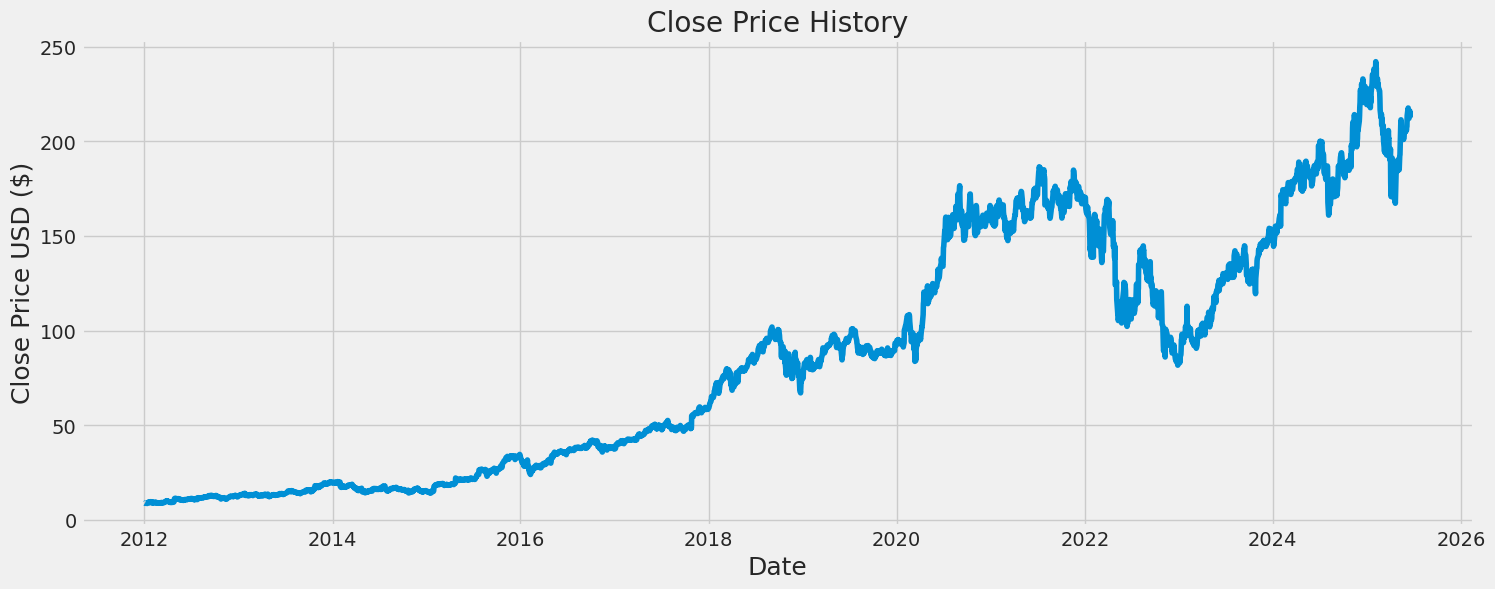

3216

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))
for i, stock in enumerate(tech_list):
    # Set DataFrame as the Stock Ticker
    globals()[stock] =yf.download(stock, start=start,end=end, progress=False)

    # Check if 'Adj Close' column exists before calculating daily returns and plotting
    if 'Adj Close' in globals()[stock].columns:
        # Calculate daily returns for each stock
        globals()[stock]['Daily Return'] = globals()[stock]['Adj Close'].pct_change()

        # Access the correct DataFrame and company name within the loop
        sns.distplot(globals()[stock]['Daily Return'].dropna(), bins=100, color='purple')
        plt.ylabel('Daily Return')
        plt.title(f'{company_name[i]}') # Use i to index company_name list
        # Could have also done:
        #AAPL['Daily Return'].hist()
    else:
        print(f"Warning: 'Adj Close' column not found for {stock}. Skipping daily return calculation and plotting.")

plt.tight_layout()

# Grab all the closing prices for the tech stock list into one DataFrame
# Add a check here too, just in case
try:
    closing_df = yf.download(tech_list, start, end,progress=False)['Adj Close']
    closing_df.head()
    # Make a new tech returns DataFrame
    tech_rets = closing_df.pct_change()
    tech_rets.head()
    # Comparing Google to itself should show a perfectly linear relationship
    import seaborn as sns
    # Assuming 'GOOG' is the column in tech_rets DataFrame
    sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')
    # We can simply call pairplot on our DataFrame for an automatic visual analysis
    # of all the comparisons
    sns.pairplot(tech_rets, kind='reg')
    # Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
    return_fig = sns.PairGrid(tech_rets.dropna())
    # Using map_upper we can specify what the upper triangle will look like.
    return_fig.map_upper(plt.scatter, color='purple')
    # We can also define the lower triangle in the figure, inclufing the plot type (kde)
    # or the color map (BluePurple)
    return_fig.map_lower(sns.kdeplot, cmap='cool_d')
    # Finally we'll define the diagonal as a series of histogram plots of the daily return
    return_fig.map_diag(plt.hist, bins=30)
    # Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
    returns_fig = sns.PairGrid(closing_df)
    # Using map_upper we can specify what the upper triangle will look like.
    returns_fig.map_upper(plt.scatter,color='purple')
    # We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
    returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
    # Finally we'll define the diagonal as a series of histogram plots of the daily return
    returns_fig.map_diag(plt.hist,bins=30)
    # Let's go ahead and use sebron for a quick correlation plot for the daily returns
    sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
    sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
    # Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
    rets = tech_rets.dropna()
    area = np.pi * 20
    plt.figure(figsize=(10, 7))
    plt.scatter(rets.mean(), rets.std(), s=area)
    plt.xlabel('Expected return')
    plt.ylabel('Risk')
    for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
        plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
except KeyError:
     print("Warning: 'Adj Close' column not found when downloading combined data. Skipping subsequent plots.")


# Get the stock quote
df = yf.download('AMZN', start='2012-01-01', end=datetime.now())
# Show teh data
df
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len
# Scale the data


